In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.metrics import accuracy_score
from keras.utils import to_categorical

dataset = https://drive.google.com/file/d/1g4qapgpvK9AeYhIUEfHzHnLOjQoB2QuF/view?usp=drive_link

In [ ]:
import os
import random
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')


nltk.download('maxent_ne_chunker')
nltk.download('words')
random.seed(92)

# Load the TensorBoard notebook extension
%load_ext tensorboard

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/amazon.csv")
df.head()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4,No issues.,23-07-2014,138,0,0,0,0,0.0,0.0
1,1,0mie,5,"Purchased this for my device, it worked as adv...",25-10-2013,409,0,0,0,0,0.0,0.0
2,2,1K3,4,it works as expected. I should have sprung for...,23-12-2012,715,0,0,0,0,0.0,0.0
3,3,1m2,5,This think has worked out great.Had a diff. br...,21-11-2013,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5,"Bought it with Retail Packaging, arrived legit...",13-07-2013,513,0,0,0,0,0.0,0.0


### **PREPROCESSING**

In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# Download NLTK data (if not already downloaded)
nltk.download('punkt')
nltk.download('stopwords')  # Download stopwords data


# Define a function for text preprocessing
def preprocess_text(text):
    # Check if the text is a string or handle other data types
    if isinstance(text, str):
        # Remove HTML tags (if any)
        text = re.sub(r'<.*?>', '', text)

        # Convert text to lowercase
        text = text.lower()

        # Remove non-alphanumeric characters and special characters
        text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

        # Tokenize the text
        tokens = word_tokenize(text)

        # Remove stopwords
        stop_words = set(stopwords.words('english'))
        tokens = [word for word in tokens if word not in stop_words]

        # Perform stemming (you can also use lemmatization if preferred)
        stemmer = PorterStemmer()
        tokens = [stemmer.stem(word) for word in tokens]

        # Join the tokens back into a single string
        preprocessed_text = ' '.join(tokens)

        return preprocessed_text
    else:
        # If the input is not a string, return an empty string or handle it as needed
        return ''

# Apply the preprocessing function to the 'reviewText' column
df['reviewText'] = df['reviewText'].apply(preprocess_text)

# Print the first few rows to check the result
print(df['reviewText'].head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0                                                 issu
1    purchas devic work advertis never much phone m...
2    work expect sprung higher capac think made bit...
3    think work greathad diff bran 64gb card went s...
4    bought retail packag arriv legit orang envelop...
Name: reviewText, dtype: object


### **Summary statistics**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics of your dataset
print(df.describe())


        Unnamed: 0      overall     day_diff  helpful_yes   helpful_no  \
count  4915.000000  4915.000000  4915.000000  4915.000000  4915.000000   
mean   2457.000000     4.587589   437.367040     1.311089     0.210376   
std    1418.982617     0.996845   209.439871    41.619161     4.023296   
min       0.000000     1.000000     1.000000     0.000000     0.000000   
25%    1228.500000     5.000000   281.000000     0.000000     0.000000   
50%    2457.000000     5.000000   431.000000     0.000000     0.000000   
75%    3685.500000     5.000000   601.000000     0.000000     0.000000   
max    4914.000000     5.000000  1064.000000  1952.000000   183.000000   

        total_vote  score_pos_neg_diff  score_average_rating  \
count  4915.000000         4915.000000           4915.000000   
mean      1.521465            1.100712              0.075468   
std      44.123095           39.367949              0.256062   
min       0.000000         -130.000000              0.000000   
25%       0.0

### Visually Distribution of review lengths

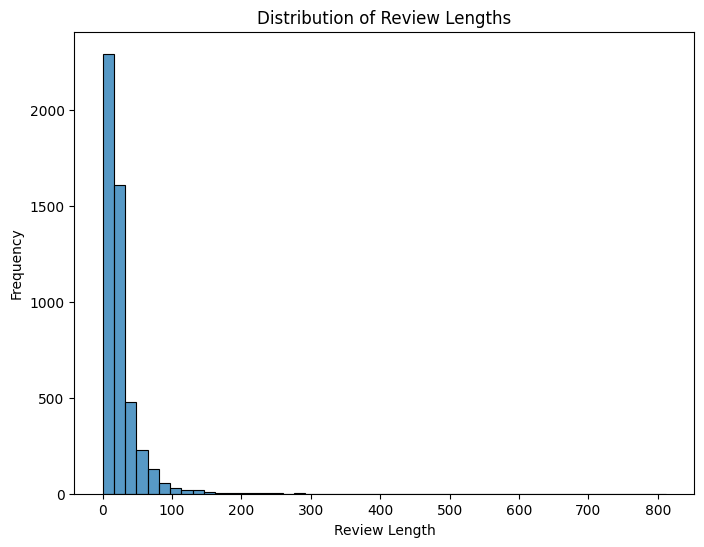

In [ ]:
# Distribution of review lengths
df['reviewLength'] = df['reviewText'].apply(lambda x: len(x.split()))
plt.figure(figsize=(8, 6))
sns.histplot(df['reviewLength'], bins=50)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()


### Word frequency analysis

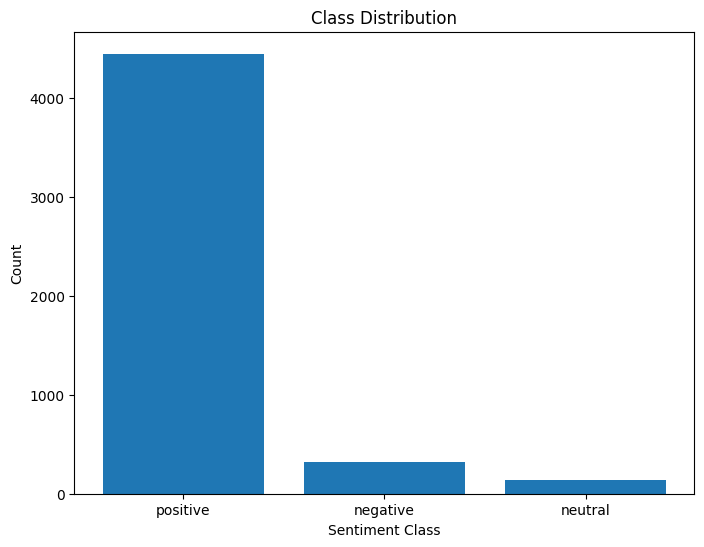

positive    4449
negative     324
neutral      142
Name: sentiment, dtype: int64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset, assuming you have a DataFrame named 'df' with a 'sentiment' column
# Replace 'your_dataset.csv' with the actual path to your dataset file
# df = pd.read_csv('your_dataset.csv')

# Count the occurrences of each sentiment class
class_counts = df['sentiment'].value_counts()

# Plot the class distribution
plt.figure(figsize=(8, 6))
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Sentiment Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

# Print the class counts
print(class_counts)


In [ ]:
# Word frequency analysis (for example, top 10 words)
from collections import Counter
word_counts = Counter(" ".join(df['reviewText']).split())
top_words = word_counts.most_common(10)
print("Top 10 most common words:")
for word, count in top_words:
    print(f"{word}: {count}")

Top 10 most common words:
card: 5524
work: 2772
use: 2206
phone: 1906
great: 1445
memori: 1374
sandisk: 1309
sd: 1205
one: 1115
galaxi: 1024


In [ ]:
def label_sentiment(rating):
    if rating >= 4:
        return 'positive'
    elif rating <= 2:
        return 'negative'
    else:
        return 'neutral'

# Assuming 'overall (rating)' is the column containing ratings
df['sentiment'] = df['overall'].apply(label_sentiment)


### **Split data into training and Testing**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['reviewText'], df['sentiment'], test_size=0.25, random_state=42)


# Check the sizes of the resulting sets
print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))


Training set size: 3686
Testing set size: 1229


In [ ]:
import numpy as np

# Get the count of each class in the training data
class_counts = df['sentiment'].value_counts()

# Calculate the class weight for each class
total_samples = len(df)
class_weights = {}
for sentiment, count in class_counts.items():
    class_weight = total_samples / (count * len(class_counts))
    class_weights[sentiment] = class_weight

# Print the class weights
print(class_weights)


{'positive': 0.3682475462650783, 'negative': 5.056584362139918, 'neutral': 11.53755868544601}


### **Tokenize the text data and pad sequences**

In [ ]:
max_words = 10000  # Number of unique words in your vocabulary
max_sequence_length = 100  # Maximum sequence length (adjust as needed)

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_padded = pad_sequences(X_train_seq, maxlen=max_sequence_length)
X_test_padded = pad_sequences(X_test_seq, maxlen=max_sequence_length)

### **one-hot encoding**

In [ ]:
# Apply one-hot encoding labels
num_classes = 3  # Since we have 3 classes (positive, neutral, negative)
label_to_index = {'positive': 0, 'neutral': 1, 'negative': 2}

In [ ]:
# Apply the mapping to your labels
y_train = y_train.map(label_to_index)
y_test = y_test.map(label_to_index)

# Now, apply one-hot encoding to your labels
y_train_encoded = to_categorical(y_train, num_classes=num_classes)
y_test_encoded = to_categorical(y_test, num_classes=num_classes)


### **LSTM model**

In [ ]:
# Build the LSTM model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_sequence_length))
model.add(LSTM(128))
model.add(Dense(num_classes, activation='softmax'))  # Use num_classes for output

In [ ]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
class_mapping = {'positive': 0, 'negative': 1, 'neutral': 2}
y_train_encoded = y_train.map(class_mapping)
y_test_encoded = y_test.map(class_mapping)



### Testing on sample review

In [ ]:
# Sample text (replace with your actual sample)
sample_text = "This is great product"

# Preprocess the sample text
sample_text_seq = tokenizer.texts_to_sequences([sample_text])
sample_text_padded = pad_sequences(sample_text_seq, maxlen=max_sequence_length)


In [ ]:
# Make predictions on the sample text
sample_predictions = model.predict(sample_text_padded)

# Interpret the predictions
predicted_label = np.argmax(sample_predictions)


1/1 [==============================] - 0s 35ms/step


In [ ]:
class_labels = ['positive', 'neutral', 'negative']
predicted_sentiment = class_labels[predicted_label]
print("Predicted Sentiment:", predicted_sentiment)


Predicted Sentiment: positive


In [ ]:
model.save_weights("sentiment_analysis.h5")

In [ ]:
# Convert model architecture to JSON format
model_json = model.to_json()

# Save the model architecture to a JSON file
with open("sentiment_analysis.json", "w") as json_file:
    json_file.write(model_json)

### Testing using saved weights

In [ ]:
from tensorflow.keras.models import model_from_json
from tensorflow.keras.preprocessing.text import Tokenizer


# Assuming you have already trained and saved your model
# Load the model architecture from the JSON file
model_architecture_path = '/content/drive/MyDrive/sentiment_analysis.json'
with open(model_architecture_path, 'r') as json_file:
    model_json = json_file.read()

# Load the model weights from the H5 file
model_weights_path = '/content/drive/MyDrive/sentiment_analysis.h5'
loaded_model = model_from_json(model_json)
loaded_model.load_weights(model_weights_path)

# Load an example review text for testing
test_review = " bad bad bad"

# Preprocess and tokenize the test review
max_words = 10000  # Number of unique words in your vocabulary
max_sequence_length = 100  # Maximum sequence length (should be the same as during training)

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts([test_review])

test_sequence = tokenizer.texts_to_sequences([test_review])
test_padded = pad_sequences(test_sequence, maxlen=max_sequence_length)

# Make predictions on the test review
predictions = loaded_model.predict(test_padded)

# Convert one-hot encoded predictions back to class labels
predicted_sentiment = np.argmax(predictions, axis=1)

# Define your class labels (positive, neutral, negative)
class_labels = ['positive', 'neutral', 'negative']

# Print the predicted sentiment
print("Predicted Sentiment:", class_labels[predicted_sentiment[0]])


1/1 [==============================] - 0s 419ms/step
Predicted Sentiment: negative
